# GPcounts applied to scRNA-Seq time series data

Nuha BinTayyash, 2020

GPcounts is a Gaussian process regression package for counts data with negative binomial and zero-inflated negative binomial likelihoods as described in the paper "Non-parametric modelling of temporal and spatial counts data from RNA-seq experiments".


This notebook shows how to fit GPcounts with zero-inflated negative binomial, negative binomial and Gaussian likelihoods using full inference on ScRNA-seq gene expression data in Islet $\alpha$ cell from [GSE8737 single cell RNA-seq ](https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE87375) dataset to find differentially expressed genes using infer trajectory and compare it with GPcounts with sparse inferece to obtain to obtain computational efficiency.

In [1]:
import pandas as pd
import numpy as np
import random
import gpflow 
from IPython.display import display

Load $\alpha$ gene expression data and pseudotime information

In [2]:
Y = pd.read_csv('../data/normalized_alpha_counts.csv',index_col=[0])
X = pd.read_csv('../data/alpha_time_points.csv',index_col=[0])
X.shape

(328, 1)

In [3]:
from GPcounts.GPcounts_Module import Fit_GPcounts
from helper import plot 

In [4]:
Y = Y.rename( index={'ENSMUSG00000015879': 'Fam184b','ENSMUSG00000059173':'Pde1a'})
genes_name = ['Fam184b','Pde1a']

,aE17.5_2_09,aE17.5_2_16,aE17.5_1_11,aE17.5_3_07,aE17.5_4_06,aE17.5_3_04,aE17.5_2_11,aE17.5_1_25,aE17.5_4_01,aE17.5_4_03,...,aP18_3_12,aP60_1_11,aP60_3_05,aP15_1_15,aP60_1_13,aP60_3_08,aP60_5_16,aP18_1_17,aP60_1_10,aP60_5_05
Fam184b,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.0,0.0,0.0,0.0,0.0,47.446494,0.0,0.0,0.0,0.0
Pde1a,53.19138,33.888555,0.0,63.941424,60.599705,40.608317,15.368216,23.786486,3.812432,44.32606,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


Probabilty of zeros in Fam184b and Pde1a genes

In [5]:
Y.loc[genes_name][Y.loc[genes_name] == 0].count(axis=1)/len(Y.columns)

Fam184b    0.859756
Pde1a      0.628049
dtype: float64

## 1. Fit GPcounts with negative binomial likelihood assuming full inference on Fam184b and Pde1a genes

In [6]:
gp_counts = Fit_GPcounts(X,Y.loc[genes_name],safe_mode = True) 
likelihoods = [ 'Zero_inflated_negative_binomial','Negative_binomial','Gaussian']

100%|██████████| 2/2 [00:56<00:00, 28.44s/it]

The results for Zero_inflated_negative_binomial likelihood:


,Dynamic_model_log_likelihood,Constant_model_log_likelihood,log_likelihood_ratio
Fam184b,-354.498102,-357.560408,3.062307
Pde1a,-758.198315,-784.106171,25.907856


100%|██████████| 2/2 [00:02<00:00,  1.07s/it]

Fam184b


name,class,transform,prior,trainable,shape,dtype,value
VGP.kernel.variance,Parameter,Softplus,,True,(),float64,7.282087686144893
VGP.kernel.lengthscales,Parameter,Softplus,,True,(),float64,0.21934277109070333
VGP.likelihood.alpha,Parameter,Softplus,,True,(),float64,0.42933143903469007
VGP.likelihood.km,Parameter,Softplus,,True,(),float64,245.17010593001652
VGP.q_mu,Parameter,,,True,"(328, 1)",float64,[[3.68701236e-01...
VGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 328, 328)",float64,"[[[4.04093097e-01, 0.00000000e+00, 0.00000000e+00..."


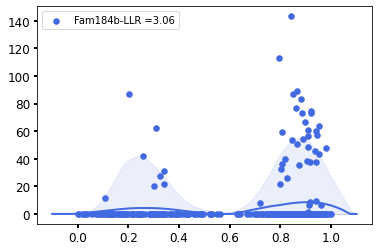

name,class,transform,prior,trainable,shape,dtype,value
VGP.kernel.variance,Parameter,Softplus,,True,(),float64,487.02458452632766
VGP.likelihood.alpha,Parameter,Softplus,,True,(),float64,0.48466199289189166
VGP.likelihood.km,Parameter,Softplus,,True,(),float64,289.6804492834449
VGP.q_mu,Parameter,,,True,"(328, 1)",float64,[[1.75277377e-01...
VGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 328, 328)",float64,"[[[-3.95190519e-03, 0.00000000e+00, 0.00000000e+00..."


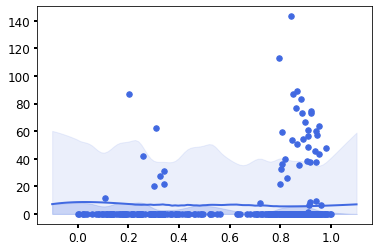

Pde1a


name,class,transform,prior,trainable,shape,dtype,value
VGP.kernel.variance,Parameter,Softplus,,True,(),float64,9.586712435888533
VGP.kernel.lengthscales,Parameter,Softplus,,True,(),float64,1.137372873407831
VGP.likelihood.alpha,Parameter,Softplus,,True,(),float64,1.2967759763652675
VGP.likelihood.km,Parameter,Softplus,,True,(),float64,65.4722228687537
VGP.q_mu,Parameter,,,True,"(328, 1)",float64,[[1.41317579e+00...
VGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 328, 328)",float64,"[[[8.06595585e-02, 0.00000000e+00, 0.00000000e+00..."


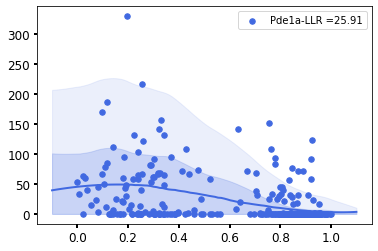

name,class,transform,prior,trainable,shape,dtype,value
VGP.kernel.variance,Parameter,Softplus,,True,(),float64,31.655413551541912
VGP.likelihood.alpha,Parameter,Softplus,,True,(),float64,1.2751176874933383
VGP.likelihood.km,Parameter,Softplus,,True,(),float64,92.5283467687865
VGP.q_mu,Parameter,,,True,"(328, 1)",float64,[[7.03739507e-01...
VGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 328, 328)",float64,"[[[-1.37332084e-02, 0.00000000e+00, 0.00000000e+00..."


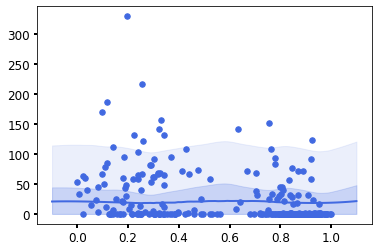

100%|██████████| 2/2 [00:10<00:00,  5.00s/it]

The results for Negative_binomial likelihood:


,Dynamic_model_log_likelihood,Constant_model_log_likelihood,log_likelihood_ratio
Fam184b,-385.423242,-385.959712,0.536470
Pde1a,-797.367045,-807.318248,9.951203


100%|██████████| 2/2 [00:02<00:00,  1.19s/it]

Fam184b


name,class,transform,prior,trainable,shape,dtype,value
VGP.kernel.variance,Parameter,Softplus,,True,(),float64,2.8186780148045587
VGP.kernel.lengthscales,Parameter,Softplus,,True,(),float64,0.1410824344022714
VGP.likelihood.alpha,Parameter,Softplus,,True,(),float64,32.89424608196025
VGP.likelihood.scale,Parameter,,,False,(),float64,1.0
VGP.q_mu,Parameter,,,True,"(328, 1)",float64,[[-2.59189871e-01...
VGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 328, 328)",float64,"[[[8.32531382e-01, 0.00000000e+00, 0.00000000e+00..."


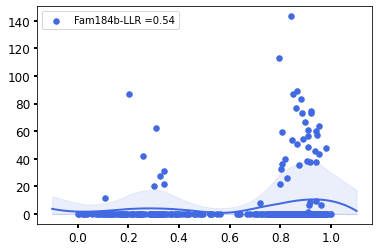

name,class,transform,prior,trainable,shape,dtype,value
VGP.kernel.variance,Parameter,Softplus,,True,(),float64,3.7226775923180533
VGP.likelihood.alpha,Parameter,Softplus,,True,(),float64,35.324348221508195
VGP.likelihood.scale,Parameter,,,False,(),float64,1.0
VGP.q_mu,Parameter,,,True,"(328, 1)",float64,[[9.86488610e-01...
VGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 328, 328)",float64,"[[[1.63758132e-01, 0.00000000e+00, 0.00000000e+00..."


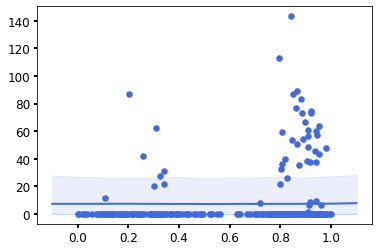

Pde1a


name,class,transform,prior,trainable,shape,dtype,value
VGP.kernel.variance,Parameter,Softplus,,True,(),float64,8.183566438252054
VGP.kernel.lengthscales,Parameter,Softplus,,True,(),float64,0.7696437970669783
VGP.likelihood.alpha,Parameter,Softplus,,True,(),float64,10.399886267248663
VGP.likelihood.scale,Parameter,,,False,(),float64,1.0
VGP.q_mu,Parameter,,,True,"(328, 1)",float64,[[1.27557650e+00...
VGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 328, 328)",float64,"[[[1.93535557e-01, 0.00000000e+00, 0.00000000e+00..."


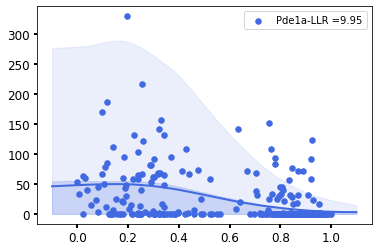

name,class,transform,prior,trainable,shape,dtype,value
VGP.kernel.variance,Parameter,Softplus,,True,(),float64,8.731413127206427
VGP.likelihood.alpha,Parameter,Softplus,,True,(),float64,11.93889081845713
VGP.likelihood.scale,Parameter,,,False,(),float64,1.0
VGP.q_mu,Parameter,,,True,"(328, 1)",float64,[[9.97611578e-01...
VGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 328, 328)",float64,"[[[6.41775345e-02, 0.00000000e+00, 0.00000000e+00..."


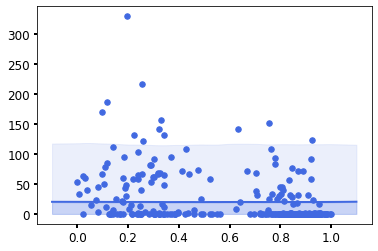

100%|██████████| 2/2 [00:01<00:00,  1.18it/s]

The results for Gaussian likelihood:


,Dynamic_model_log_likelihood,Constant_model_log_likelihood,log_likelihood_ratio
Fam184b,-551.722537,-554.274201,2.551665
Pde1a,-623.552579,-663.040231,39.487652


100%|██████████| 2/2 [00:00<00:00, 22.03it/s]

Fam184b


name,class,transform,prior,trainable,shape,dtype,value
GPR.kernel.variance,Parameter,Softplus,,True,(),float64,0.33384
GPR.kernel.lengthscales,Parameter,Softplus,,True,(),float64,1.00389
GPR.likelihood.variance,Parameter,Softplus + Shift,,True,(),float64,1.66186


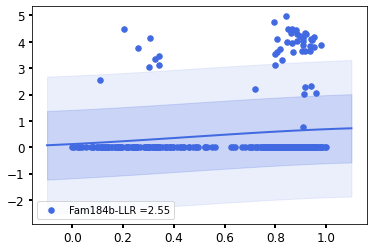

name,class,transform,prior,trainable,shape,dtype,value
GPR.kernel.variance,Parameter,Softplus,,True,(),float64,0.254744
GPR.likelihood.variance,Parameter,Softplus + Shift,,True,(),float64,1.69877


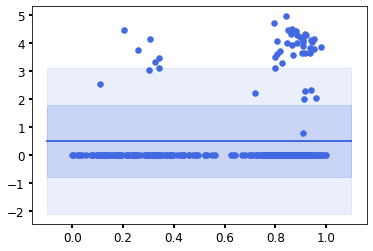

Pde1a


name,class,transform,prior,trainable,shape,dtype,value
GPR.kernel.variance,Parameter,Softplus,,True,(),float64,6.44783
GPR.kernel.lengthscales,Parameter,Softplus,,True,(),float64,1.1664
GPR.likelihood.variance,Parameter,Softplus + Shift,,True,(),float64,2.53578


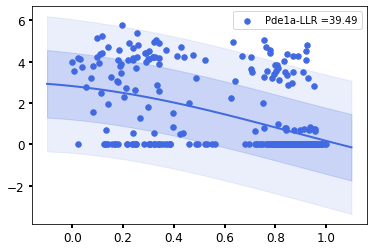

name,class,transform,prior,trainable,shape,dtype,value
GPR.kernel.variance,Parameter,Softplus,,True,(),float64,1.42893
GPR.likelihood.variance,Parameter,Softplus + Shift,,True,(),float64,3.28677


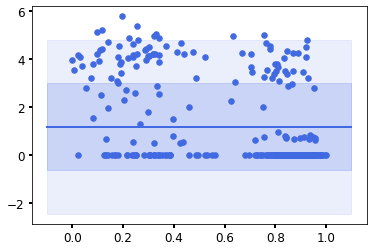

In [7]:
test_name = 'One_sample_test' # name of the test

for likelihood in likelihoods:
    results = gp_counts.One_sample_test(likelihood)
    print('The results for '+likelihood+' likelihood:')
    display(results)
    params = gp_counts.load_predict_models(genes_name,test_name,likelihood) 
    plot(params,X.values,Y.loc[genes_name],results)

## 2. Fit GPcounts with negative binomial likelihood assuming sparse inference to obtain computational efficiency  on Fam184b and Pde1a genes

GPcounts by defaults use $5\%(N^*)$ to set the number of inducing points $M$ and [ $\epsilon- approximate\quad M-DPP$ algorithm](https://github.com/markvdw/RobustGP) to set the location of inducing points $Z$

$^* N = length(X)$

100%|██████████| 2/2 [00:12<00:00,  6.31s/it]

The results for Zero_inflated_negative_binomial likelihood:


,Dynamic_model_log_likelihood,Constant_model_log_likelihood,log_likelihood_ratio
Fam184b,-354.510375,-357.566388,3.056013
Pde1a,-758.196405,-784.107533,25.911129


100%|██████████| 2/2 [00:02<00:00,  1.00s/it]

Fam184b


name,class,transform,prior,trainable,shape,dtype,value
SVGP.kernel.variance,Parameter,Softplus,,True,(),float64,7.23131008769608
SVGP.kernel.lengthscales,Parameter,Softplus,,True,(),float64,0.21889035319534025
SVGP.likelihood.alpha,Parameter,Softplus,,True,(),float64,0.42954023506259575
SVGP.likelihood.km,Parameter,Softplus,,True,(),float64,239.8612507894008
SVGP.inducing_variable.Z,Parameter,,,True,"(16, 1)",float64,[[0.71943149...
SVGP.q_mu,Parameter,,,True,"(16, 1)",float64,[[1.05290573e+00...
SVGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 16, 16)",float64,"[[[1.45693319e-01, 0.00000000e+00, 0.00000000e+00..."


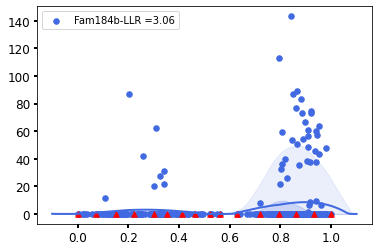

name,class,transform,prior,trainable,shape,dtype,value
SVGP.kernel.variance,Parameter,Softplus,,True,(),float64,493.0386931211742
SVGP.likelihood.alpha,Parameter,Softplus,,True,(),float64,0.4846804077278373
SVGP.likelihood.km,Parameter,Softplus,,True,(),float64,289.63341071149574
SVGP.inducing_variable.Z,Parameter,,,False,"(16, 1)",float64,[[0.71943149...
SVGP.q_mu,Parameter,,,True,"(16, 1)",float64,[[0.17420433...
SVGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 16, 16)",float64,"[[[-3.92760098e-03, 0.00000000e+00, 0.00000000e+00..."


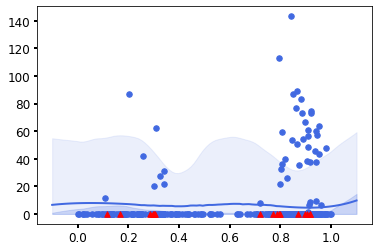

Pde1a


name,class,transform,prior,trainable,shape,dtype,value
SVGP.kernel.variance,Parameter,Softplus,,True,(),float64,10.047332512305184
SVGP.kernel.lengthscales,Parameter,Softplus,,True,(),float64,1.1483533332599067
SVGP.likelihood.alpha,Parameter,Softplus,,True,(),float64,1.2938919682622338
SVGP.likelihood.km,Parameter,Softplus,,True,(),float64,65.98182436605661
SVGP.inducing_variable.Z,Parameter,,,True,"(16, 1)",float64,[[0.71943149...
SVGP.q_mu,Parameter,,,True,"(16, 1)",float64,[[1.14872393e+00...
SVGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 16, 16)",float64,"[[[3.48493869e-02, 0.00000000e+00, 0.00000000e+00..."


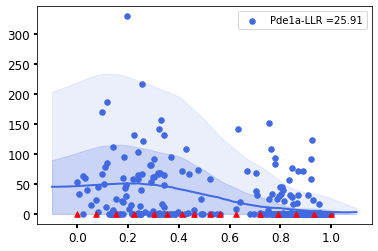

name,class,transform,prior,trainable,shape,dtype,value
SVGP.kernel.variance,Parameter,Softplus,,True,(),float64,31.828925975571384
SVGP.likelihood.alpha,Parameter,Softplus,,True,(),float64,1.275155386992523
SVGP.likelihood.km,Parameter,Softplus,,True,(),float64,92.53178974520546
SVGP.inducing_variable.Z,Parameter,,,False,"(16, 1)",float64,[[0.71943149...
SVGP.q_mu,Parameter,,,True,"(16, 1)",float64,[[7.01825511e-01...
SVGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 16, 16)",float64,"[[[-1.37030253e-02, 0.00000000e+00, 0.00000000e+00..."


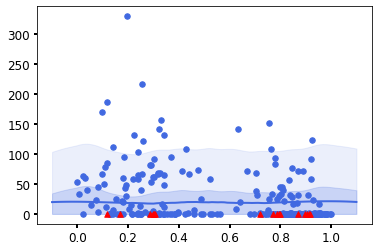

100%|██████████| 2/2 [00:05<00:00,  2.90s/it]

The results for Negative_binomial likelihood:


,Dynamic_model_log_likelihood,Constant_model_log_likelihood,log_likelihood_ratio
Fam184b,-385.423247,-385.959709,0.536462
Pde1a,-797.366947,-807.318240,9.951293


100%|██████████| 2/2 [00:01<00:00,  1.05it/s]

Fam184b


name,class,transform,prior,trainable,shape,dtype,value
SVGP.kernel.variance,Parameter,Softplus,,True,(),float64,2.820294454112077
SVGP.kernel.lengthscales,Parameter,Softplus,,True,(),float64,0.14103802128495696
SVGP.likelihood.alpha,Parameter,Softplus,,True,(),float64,32.88947544894336
SVGP.likelihood.scale,Parameter,,,False,(),float64,1.0
SVGP.inducing_variable.Z,Parameter,,,True,"(16, 1)",float64,[[0.71943149...
SVGP.q_mu,Parameter,,,True,"(16, 1)",float64,[[3.86833859e-01...
SVGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 16, 16)",float64,"[[[5.54705445e-01, 0.00000000e+00, 0.00000000e+00..."


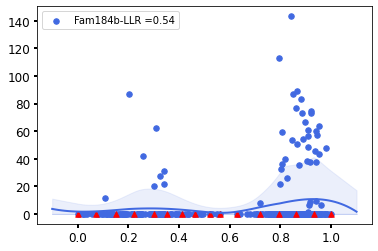

name,class,transform,prior,trainable,shape,dtype,value
SVGP.kernel.variance,Parameter,Softplus,,True,(),float64,3.722771623840931
SVGP.likelihood.alpha,Parameter,Softplus,,True,(),float64,35.32479488323072
SVGP.likelihood.scale,Parameter,,,False,(),float64,1.0
SVGP.inducing_variable.Z,Parameter,,,False,"(16, 1)",float64,[[0.71943149...
SVGP.q_mu,Parameter,,,True,"(16, 1)",float64,[[9.86467580e-01...
SVGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 16, 16)",float64,"[[[1.63758101e-01, 0.00000000e+00, 0.00000000e+00..."


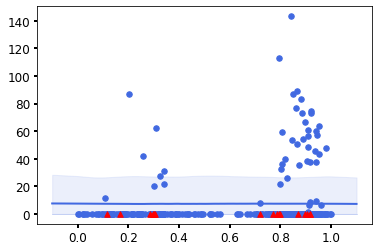

Pde1a


name,class,transform,prior,trainable,shape,dtype,value
SVGP.kernel.variance,Parameter,Softplus,,True,(),float64,8.036853837484564
SVGP.kernel.lengthscales,Parameter,Softplus,,True,(),float64,0.766130719333926
SVGP.likelihood.alpha,Parameter,Softplus,,True,(),float64,10.398632463190738
SVGP.likelihood.scale,Parameter,,,False,(),float64,1.0
SVGP.inducing_variable.Z,Parameter,,,True,"(16, 1)",float64,[[0.71943149...
SVGP.q_mu,Parameter,,,True,"(16, 1)",float64,[[9.29761857e-01...
SVGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 16, 16)",float64,"[[[8.55673335e-02, 0.00000000e+00, 0.00000000e+00..."


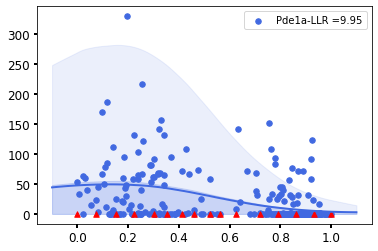

name,class,transform,prior,trainable,shape,dtype,value
SVGP.kernel.variance,Parameter,Softplus,,True,(),float64,8.725946227022561
SVGP.likelihood.alpha,Parameter,Softplus,,True,(),float64,11.939130823045273
SVGP.likelihood.scale,Parameter,,,False,(),float64,1.0
SVGP.inducing_variable.Z,Parameter,,,False,"(16, 1)",float64,[[0.71943149...
SVGP.q_mu,Parameter,,,True,"(16, 1)",float64,[[9.97939492e-01...
SVGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 16, 16)",float64,"[[[6.42114870e-02, 0.00000000e+00, 0.00000000e+00..."


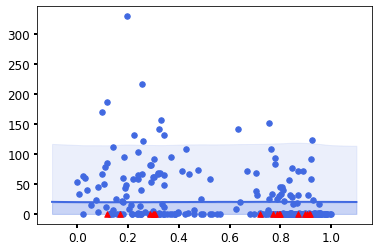

100%|██████████| 2/2 [00:02<00:00,  1.16s/it]

The results for Gaussian likelihood:


,Dynamic_model_log_likelihood,Constant_model_log_likelihood,log_likelihood_ratio
Fam184b,-551.722568,-554.274207,2.551639
Pde1a,-623.552600,-663.040234,39.487634


100%|██████████| 2/2 [00:00<00:00, 12.91it/s]

Fam184b


name,class,transform,prior,trainable,shape,dtype,value
SGPR.kernel.variance,Parameter,Softplus,,True,(),float64,0.33382418815948744
SGPR.kernel.lengthscales,Parameter,Softplus,,True,(),float64,1.0037887135570565
SGPR.likelihood.variance,Parameter,Softplus + Shift,,True,(),float64,1.6618984712077192
SGPR.inducing_variable.Z,Parameter,,,True,"(16, 1)",float64,[[0.71943149...


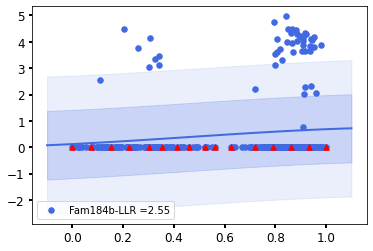

name,class,transform,prior,trainable,shape,dtype,value
SGPR.kernel.variance,Parameter,Softplus,,True,(),float64,0.2547441213793411
SGPR.likelihood.variance,Parameter,Softplus + Shift,,True,(),float64,1.6987717753452374
SGPR.inducing_variable.Z,Parameter,,,False,"(16, 1)",float64,[[0.71943149...


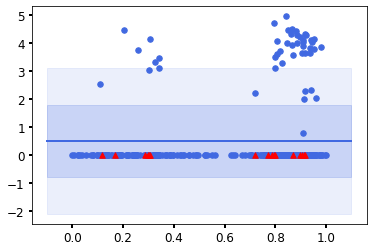

Pde1a


name,class,transform,prior,trainable,shape,dtype,value
SGPR.kernel.variance,Parameter,Softplus,,True,(),float64,6.46093669998511
SGPR.kernel.lengthscales,Parameter,Softplus,,True,(),float64,1.1678477536024725
SGPR.likelihood.variance,Parameter,Softplus + Shift,,True,(),float64,2.5356320358231565
SGPR.inducing_variable.Z,Parameter,,,True,"(16, 1)",float64,[[0.71943149...


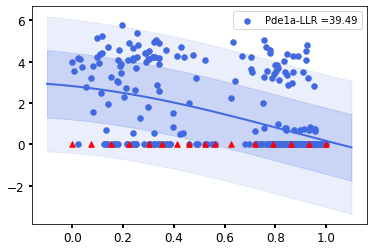

name,class,transform,prior,trainable,shape,dtype,value
SGPR.kernel.variance,Parameter,Softplus,,True,(),float64,1.4289333751494782
SGPR.likelihood.variance,Parameter,Softplus + Shift,,True,(),float64,3.2867712594890457
SGPR.inducing_variable.Z,Parameter,,,False,"(16, 1)",float64,[[0.71943149...


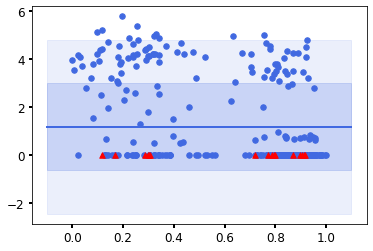

In [8]:
sparse = True 
gp_counts = Fit_GPcounts(X,Y.loc[genes_name],sparse = sparse,safe_mode = True) # use sparse inference

for likelihood in likelihoods:
    results = gp_counts.One_sample_test(likelihood)
    print('The results for '+likelihood+' likelihood:')
    display(results)
    params = gp_counts.load_predict_models(genes_name,test_name,likelihood)
    plot(params,X.values,Y.loc[genes_name],results,sparse) 

To set the number of inducing points $M = \Omega(log(N))$ using the recommend method  use 𝜖−𝑎𝑝𝑝𝑟𝑜𝑥𝑖𝑚𝑎𝑡𝑒𝑀−𝐷𝑃𝑃 algorithm to set the location of inducing points  𝑍

100%|██████████| 2/2 [00:08<00:00,  4.42s/it]

The results for Zero_inflated_negative_binomial likelihood:


,Dynamic_model_log_likelihood,Constant_model_log_likelihood,log_likelihood_ratio
Fam184b,-355.432286,-357.556806,2.124519
Pde1a,-758.196785,-784.106538,25.909753


100%|██████████| 2/2 [00:01<00:00,  1.21it/s]

Fam184b


name,class,transform,prior,trainable,shape,dtype,value
SVGP.kernel.variance,Parameter,Softplus,,True,(),float64,247.09118221546217
SVGP.kernel.lengthscales,Parameter,Softplus,,True,(),float64,20.53158597742972
SVGP.likelihood.alpha,Parameter,Softplus,,True,(),float64,0.4902893167196842
SVGP.likelihood.km,Parameter,Softplus,,True,(),float64,269.6724770844025
SVGP.inducing_variable.Z,Parameter,,,True,"(4, 1)",float64,[[0.71943149...
SVGP.q_mu,Parameter,,,True,"(4, 1)",float64,[[0.24330349...
SVGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 4, 4)",float64,"[[[0.0055925, 0., 0...."


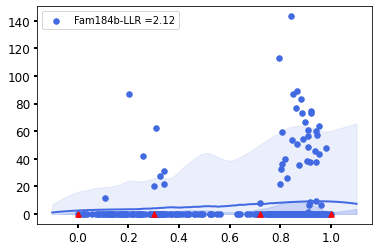

name,class,transform,prior,trainable,shape,dtype,value
SVGP.kernel.variance,Parameter,Softplus,,True,(),float64,478.53687170325895
SVGP.likelihood.alpha,Parameter,Softplus,,True,(),float64,0.4843230096459833
SVGP.likelihood.km,Parameter,Softplus,,True,(),float64,289.4909672428542
SVGP.inducing_variable.Z,Parameter,,,False,"(4, 1)",float64,[[0.71943149...
SVGP.q_mu,Parameter,,,True,"(4, 1)",float64,[[0.17681497...
SVGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 4, 4)",float64,"[[[-3.98498733e-03, 0.00000000e+00, 0.00000000e+00..."


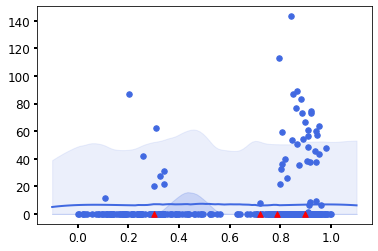

Pde1a


name,class,transform,prior,trainable,shape,dtype,value
SVGP.kernel.variance,Parameter,Softplus,,True,(),float64,10.183500253950841
SVGP.kernel.lengthscales,Parameter,Softplus,,True,(),float64,1.1544240282401113
SVGP.likelihood.alpha,Parameter,Softplus,,True,(),float64,1.2942668049809931
SVGP.likelihood.km,Parameter,Softplus,,True,(),float64,65.95919262676873
SVGP.inducing_variable.Z,Parameter,,,True,"(4, 1)",float64,[[0.71943149...
SVGP.q_mu,Parameter,,,True,"(4, 1)",float64,[[1.14072833...
SVGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 4, 4)",float64,"[[[0.03461673, 0., 0...."


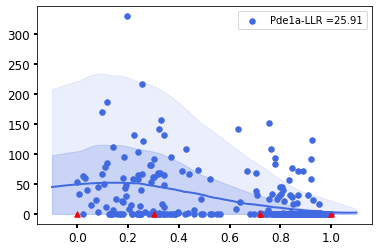

name,class,transform,prior,trainable,shape,dtype,value
SVGP.kernel.variance,Parameter,Softplus,,True,(),float64,31.704069105180633
SVGP.likelihood.alpha,Parameter,Softplus,,True,(),float64,1.2751341238146796
SVGP.likelihood.km,Parameter,Softplus,,True,(),float64,92.53600099843531
SVGP.inducing_variable.Z,Parameter,,,False,"(4, 1)",float64,[[0.71943149...
SVGP.q_mu,Parameter,,,True,"(4, 1)",float64,[[7.03208535e-01...
SVGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 4, 4)",float64,"[[[-1.37296177e-02, 0.00000000e+00, 0.00000000e+00..."


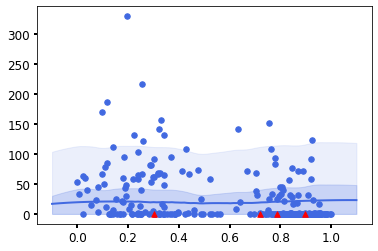

100%|██████████| 2/2 [00:06<00:00,  3.09s/it]

The results for Negative_binomial likelihood:


,Dynamic_model_log_likelihood,Constant_model_log_likelihood,log_likelihood_ratio
Fam184b,-385.475997,-385.959710,0.483713
Pde1a,-797.368310,-807.318243,9.949933


100%|██████████| 2/2 [00:01<00:00,  1.01it/s]

Fam184b


name,class,transform,prior,trainable,shape,dtype,value
SVGP.kernel.variance,Parameter,Softplus,,True,(),float64,3.3394921611657704
SVGP.kernel.lengthscales,Parameter,Softplus,,True,(),float64,1.1324257600577736
SVGP.likelihood.alpha,Parameter,Softplus,,True,(),float64,34.44306510477868
SVGP.likelihood.scale,Parameter,,,False,(),float64,1.0
SVGP.inducing_variable.Z,Parameter,,,True,"(4, 1)",float64,[[0.71943149...
SVGP.q_mu,Parameter,,,True,"(4, 1)",float64,[[1.05503849...
SVGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 4, 4)",float64,"[[[-0.17987643, 0., 0...."


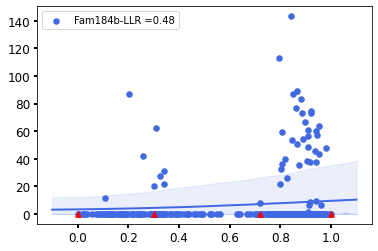

name,class,transform,prior,trainable,shape,dtype,value
SVGP.kernel.variance,Parameter,Softplus,,True,(),float64,3.722749508386785
SVGP.likelihood.alpha,Parameter,Softplus,,True,(),float64,35.32433580133877
SVGP.likelihood.scale,Parameter,,,False,(),float64,1.0
SVGP.inducing_variable.Z,Parameter,,,False,"(4, 1)",float64,[[0.71943149...
SVGP.q_mu,Parameter,,,True,"(4, 1)",float64,[[9.86491511e-01...
SVGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 4, 4)",float64,"[[[1.63755213e-01, 0.00000000e+00, 0.00000000e+00..."


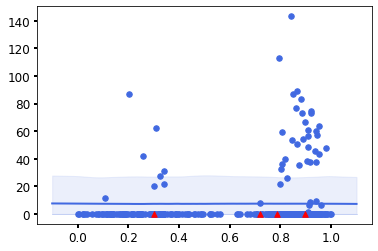

Pde1a


name,class,transform,prior,trainable,shape,dtype,value
SVGP.kernel.variance,Parameter,Softplus,,True,(),float64,8.063085472047671
SVGP.kernel.lengthscales,Parameter,Softplus,,True,(),float64,0.7707499395071855
SVGP.likelihood.alpha,Parameter,Softplus,,True,(),float64,10.398932119285126
SVGP.likelihood.scale,Parameter,,,False,(),float64,1.0
SVGP.inducing_variable.Z,Parameter,,,True,"(4, 1)",float64,[[0.71943149...
SVGP.q_mu,Parameter,,,True,"(4, 1)",float64,[[0.92771357...
SVGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 4, 4)",float64,"[[[0.08525904, 0., 0...."


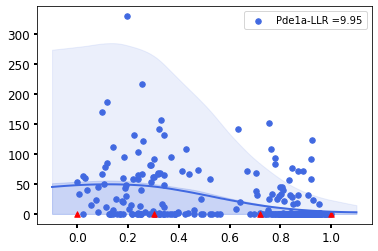

name,class,transform,prior,trainable,shape,dtype,value
SVGP.kernel.variance,Parameter,Softplus,,True,(),float64,8.72414111514838
SVGP.likelihood.alpha,Parameter,Softplus,,True,(),float64,11.940704760714066
SVGP.likelihood.scale,Parameter,,,False,(),float64,1.0
SVGP.inducing_variable.Z,Parameter,,,False,"(4, 1)",float64,[[0.71943149...
SVGP.q_mu,Parameter,,,True,"(4, 1)",float64,[[9.98043250e-01...
SVGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 4, 4)",float64,"[[[6.42292056e-02, 0.00000000e+00, 0.00000000e+00..."


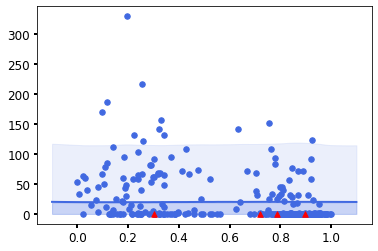

100%|██████████| 2/2 [00:02<00:00,  1.04s/it]

The results for Gaussian likelihood:


,Dynamic_model_log_likelihood,Constant_model_log_likelihood,log_likelihood_ratio
Fam184b,-551.722736,-554.274225,2.551489
Pde1a,-623.552827,-663.040243,39.487416


100%|██████████| 2/2 [00:00<00:00, 19.31it/s]

Fam184b


name,class,transform,prior,trainable,shape,dtype,value
SGPR.kernel.variance,Parameter,Softplus,,True,(),float64,0.3340312581183013
SGPR.kernel.lengthscales,Parameter,Softplus,,True,(),float64,1.0046010348749332
SGPR.likelihood.variance,Parameter,Softplus + Shift,,True,(),float64,1.6618643182259591
SGPR.inducing_variable.Z,Parameter,,,True,"(4, 1)",float64,[[0.71943149...


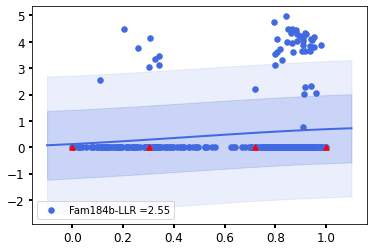

name,class,transform,prior,trainable,shape,dtype,value
SGPR.kernel.variance,Parameter,Softplus,,True,(),float64,0.2547443084454041
SGPR.likelihood.variance,Parameter,Softplus + Shift,,True,(),float64,1.6987719634661966
SGPR.inducing_variable.Z,Parameter,,,False,"(4, 1)",float64,[[0.71943149...


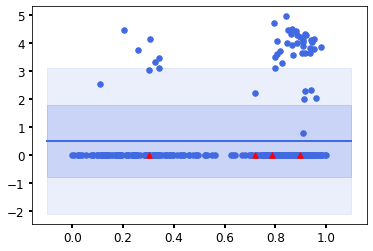

Pde1a


name,class,transform,prior,trainable,shape,dtype,value
SGPR.kernel.variance,Parameter,Softplus,,True,(),float64,6.464807070456666
SGPR.kernel.lengthscales,Parameter,Softplus,,True,(),float64,1.168336941180327
SGPR.likelihood.variance,Parameter,Softplus + Shift,,True,(),float64,2.5355706634550277
SGPR.inducing_variable.Z,Parameter,,,True,"(4, 1)",float64,[[0.71943149...


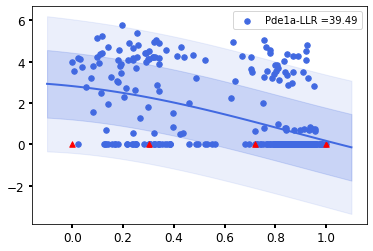

name,class,transform,prior,trainable,shape,dtype,value
SGPR.kernel.variance,Parameter,Softplus,,True,(),float64,1.4289335644327146
SGPR.likelihood.variance,Parameter,Softplus + Shift,,True,(),float64,3.2867714472217067
SGPR.inducing_variable.Z,Parameter,,,False,"(4, 1)",float64,[[0.71943149...


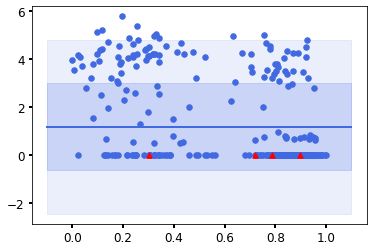

In [9]:
gp_counts = Fit_GPcounts(X,Y.loc[genes_name],M = 4, sparse = sparse,safe_mode = True) # use sparse inference

for likelihood in likelihoods:
    results = gp_counts.One_sample_test(likelihood)
    print('The results for '+likelihood+' likelihood:')
    display(results)
    params = gp_counts.load_predict_models(genes_name,test_name,likelihood)
    plot(params,X.values,Y.loc[genes_name],results,sparse)


To use kmean algorithm to set the location of inducing points 𝑍

$^*$ GPcounts by defaults use $5\%(N^*)$ to set the number of inducing points $M$ if M not specified

100%|██████████| 2/2 [01:03<00:00, 31.72s/it]

The results for Zero_inflated_negative_binomial likelihood:


,Dynamic_model_log_likelihood,Constant_model_log_likelihood,log_likelihood_ratio
Fam184b,-374.914879,-357.566388,-17.34849
Pde1a,-767.500143,-784.107533,16.60739


100%|██████████| 2/2 [00:01<00:00,  1.03it/s]

Fam184b


name,class,transform,prior,trainable,shape,dtype,value
SVGP.kernel.variance,Parameter,Softplus,,True,(),float64,7.364528252382745
SVGP.kernel.lengthscales,Parameter,Softplus,,True,(),float64,1.7580531885057036
SVGP.likelihood.alpha,Parameter,Softplus,,True,(),float64,2.672159024028338
SVGP.likelihood.km,Parameter,Softplus,,True,(),float64,74.92928597293917
SVGP.inducing_variable.Z,Parameter,,,True,"(16, 1)",float64,[[-0.74991093...
SVGP.q_mu,Parameter,,,True,"(16, 1)",float64,[[0.43524914...
SVGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 16, 16)",float64,"[[[3.35578005e-01, 0.00000000e+00, 0.00000000e+00..."


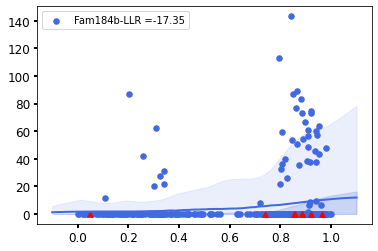

name,class,transform,prior,trainable,shape,dtype,value
SVGP.kernel.variance,Parameter,Softplus,,True,(),float64,493.0386931211742
SVGP.likelihood.alpha,Parameter,Softplus,,True,(),float64,0.4846804077278373
SVGP.likelihood.km,Parameter,Softplus,,True,(),float64,289.63341071149574
SVGP.inducing_variable.Z,Parameter,,,False,"(16, 1)",float64,[[0.02483172...
SVGP.q_mu,Parameter,,,True,"(16, 1)",float64,[[0.17420433...
SVGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 16, 16)",float64,"[[[-3.92760098e-03, 0.00000000e+00, 0.00000000e+00..."


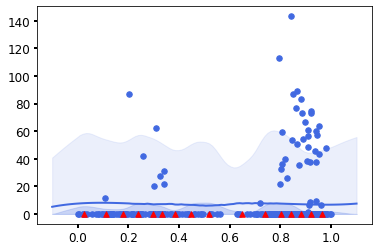

Pde1a


name,class,transform,prior,trainable,shape,dtype,value
SVGP.kernel.variance,Parameter,Softplus,,True,(),float64,3.5452978755891866
SVGP.kernel.lengthscales,Parameter,Softplus,,True,(),float64,1.0277094908788804
SVGP.likelihood.alpha,Parameter,Softplus,,True,(),float64,1.95929041627436
SVGP.likelihood.km,Parameter,Softplus,,True,(),float64,35.017718802866106
SVGP.inducing_variable.Z,Parameter,,,True,"(16, 1)",float64,[[0.33536404...
SVGP.q_mu,Parameter,,,True,"(16, 1)",float64,[[2.19309326...
SVGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 16, 16)",float64,"[[[-5.63153383e-02, 0.00000000e+00, 0.00000000e+00..."


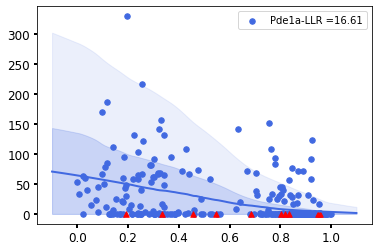

name,class,transform,prior,trainable,shape,dtype,value
SVGP.kernel.variance,Parameter,Softplus,,True,(),float64,31.828925975571384
SVGP.likelihood.alpha,Parameter,Softplus,,True,(),float64,1.275155386992523
SVGP.likelihood.km,Parameter,Softplus,,True,(),float64,92.53178974520546
SVGP.inducing_variable.Z,Parameter,,,False,"(16, 1)",float64,[[0.02483172...
SVGP.q_mu,Parameter,,,True,"(16, 1)",float64,[[7.01825511e-01...
SVGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 16, 16)",float64,"[[[-1.37030253e-02, 0.00000000e+00, 0.00000000e+00..."


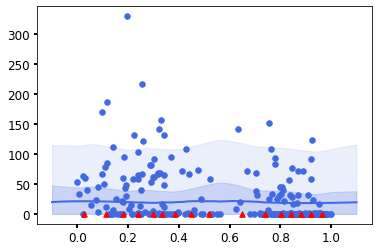

100%|██████████| 2/2 [00:06<00:00,  3.42s/it]

The results for Negative_binomial likelihood:


,Dynamic_model_log_likelihood,Constant_model_log_likelihood,log_likelihood_ratio
Fam184b,-385.560905,-385.959709,0.398804
Pde1a,-797.366993,-807.318240,9.951248


100%|██████████| 2/2 [00:01<00:00,  1.10it/s]

Fam184b


name,class,transform,prior,trainable,shape,dtype,value
SVGP.kernel.variance,Parameter,Softplus,,True,(),float64,5.598889801848669
SVGP.kernel.lengthscales,Parameter,Softplus,,True,(),float64,1.7579679933939585
SVGP.likelihood.alpha,Parameter,Softplus,,True,(),float64,34.10903193145507
SVGP.likelihood.scale,Parameter,,,False,(),float64,1.0
SVGP.inducing_variable.Z,Parameter,,,True,"(16, 1)",float64,[[-1.08776744...
SVGP.q_mu,Parameter,,,True,"(16, 1)",float64,[[-0.07544431...
SVGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 16, 16)",float64,"[[[-6.42727306e-01, 0.00000000e+00, 0.00000000e+00..."


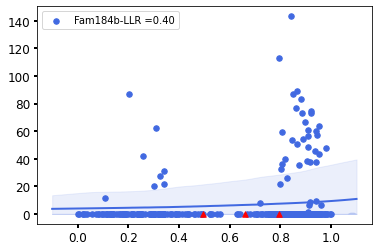

name,class,transform,prior,trainable,shape,dtype,value
SVGP.kernel.variance,Parameter,Softplus,,True,(),float64,3.722564084489659
SVGP.likelihood.alpha,Parameter,Softplus,,True,(),float64,35.32432715303336
SVGP.likelihood.scale,Parameter,,,False,(),float64,1.0
SVGP.inducing_variable.Z,Parameter,,,False,"(16, 1)",float64,[[0.02483172...
SVGP.q_mu,Parameter,,,True,"(16, 1)",float64,[[9.86503013e-01...
SVGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 16, 16)",float64,"[[[1.63756314e-01, 0.00000000e+00, 0.00000000e+00..."


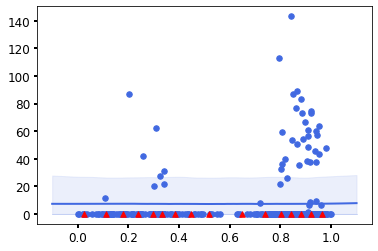

Pde1a


name,class,transform,prior,trainable,shape,dtype,value
SVGP.kernel.variance,Parameter,Softplus,,True,(),float64,8.042303982185096
SVGP.kernel.lengthscales,Parameter,Softplus,,True,(),float64,0.7681453801427326
SVGP.likelihood.alpha,Parameter,Softplus,,True,(),float64,10.397436732735715
SVGP.likelihood.scale,Parameter,,,False,(),float64,1.0
SVGP.inducing_variable.Z,Parameter,,,True,"(16, 1)",float64,[[0.67429351...
SVGP.q_mu,Parameter,,,True,"(16, 1)",float64,[[9.99584776e-01...
SVGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 16, 16)",float64,"[[[9.25948996e-02, 0.00000000e+00, 0.00000000e+00..."


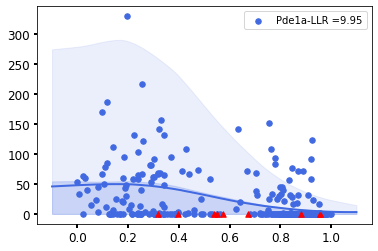

name,class,transform,prior,trainable,shape,dtype,value
SVGP.kernel.variance,Parameter,Softplus,,True,(),float64,8.727673078994366
SVGP.likelihood.alpha,Parameter,Softplus,,True,(),float64,11.939217908138293
SVGP.likelihood.scale,Parameter,,,False,(),float64,1.0
SVGP.inducing_variable.Z,Parameter,,,False,"(16, 1)",float64,[[0.02483172...
SVGP.q_mu,Parameter,,,True,"(16, 1)",float64,[[9.97838609e-01...
SVGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 16, 16)",float64,"[[[6.42018945e-02, 0.00000000e+00, 0.00000000e+00..."


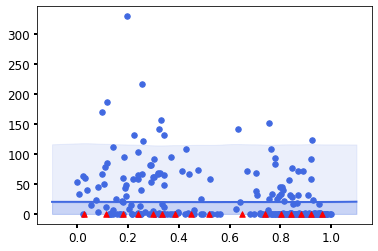

100%|██████████| 2/2 [00:02<00:00,  1.04s/it]

The results for Gaussian likelihood:


,Dynamic_model_log_likelihood,Constant_model_log_likelihood,log_likelihood_ratio
Fam184b,-551.722597,-554.274207,2.551611
Pde1a,-623.552602,-663.040234,39.487632


100%|██████████| 2/2 [00:00<00:00, 26.64it/s]

Fam184b


name,class,transform,prior,trainable,shape,dtype,value
SGPR.kernel.variance,Parameter,Softplus,,True,(),float64,0.33383710754203627
SGPR.kernel.lengthscales,Parameter,Softplus,,True,(),float64,1.0038410766836856
SGPR.likelihood.variance,Parameter,Softplus + Shift,,True,(),float64,1.6618639479606778
SGPR.inducing_variable.Z,Parameter,,,True,"(16, 1)",float64,[[0.21605994...


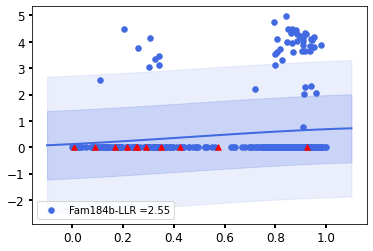

name,class,transform,prior,trainable,shape,dtype,value
SGPR.kernel.variance,Parameter,Softplus,,True,(),float64,0.2547441213793411
SGPR.likelihood.variance,Parameter,Softplus + Shift,,True,(),float64,1.6987717753452374
SGPR.inducing_variable.Z,Parameter,,,False,"(16, 1)",float64,[[0.02483172...


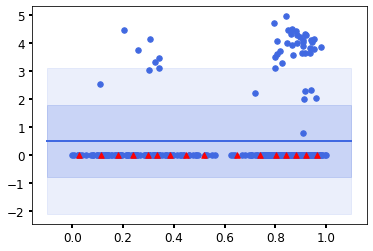

Pde1a


name,class,transform,prior,trainable,shape,dtype,value
SGPR.kernel.variance,Parameter,Softplus,,True,(),float64,6.460948188588748
SGPR.kernel.lengthscales,Parameter,Softplus,,True,(),float64,1.1678036255661732
SGPR.likelihood.variance,Parameter,Softplus + Shift,,True,(),float64,2.5355976354140597
SGPR.inducing_variable.Z,Parameter,,,True,"(16, 1)",float64,[[0.60203697...


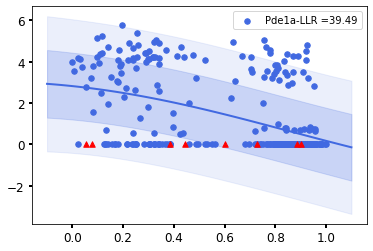

name,class,transform,prior,trainable,shape,dtype,value
SGPR.kernel.variance,Parameter,Softplus,,True,(),float64,1.4289333751494782
SGPR.likelihood.variance,Parameter,Softplus + Shift,,True,(),float64,3.2867712594890457
SGPR.inducing_variable.Z,Parameter,,,False,"(16, 1)",float64,[[0.02483172...


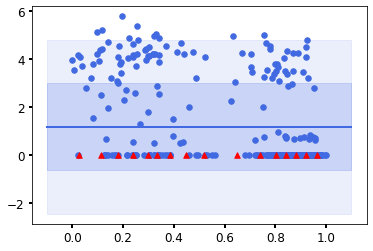

In [10]:
gp_counts = Fit_GPcounts(X,Y.loc[genes_name],sparse = sparse,safe_mode = True) # use sparse inference
gp_counts.kmean_algorithm_inducing_points( M = 16)

for likelihood in likelihoods:
    results = gp_counts.One_sample_test(likelihood)
    print('The results for '+likelihood+' likelihood:')
    display(results)
    params = gp_counts.load_predict_models(genes_name,test_name,likelihood)
    plot(params,X.values,Y.loc[genes_name],results,sparse)